## Non-dominated sorting algorithm


# Multi-Objective Optimization for Tuning MPC Parameters

## Background

Model Predictive Control (MPC) is a sophisticated control strategy used in various industries, including process control, robotics, and autonomous systems. MPC predicts the future behavior of a system and optimizes control inputs over a finite prediction horizon, considering system dynamics, constraints, and performance objectives. However, tuning the parameters of MPC for optimal performance remains a challenge.

## Motivation

The optimization of MPC parameters is crucial for achieving optimal control system performance. Traditional approaches to parameter tuning involve manual adjustments or trial-and-error methods, which are time-consuming and impractical for complex systems. Additionally, conflicting objectives and the dynamic nature of real-world systems require adaptive tuning strategies.

To address these challenges, an automated and systematic approach to MPC parameter tuning is needed. This study aims to introduce such an approach by applying optimization techniques to find optimal parameters for MPC.

The primary goal of this study is to enhance the overall performance of MPC systems by optimizing parameters such as the prediction horizon ($\tau_h$), state velocity weighting factor ($K_v$), and control input weight ($\gamma$). By striking the right balance between conflicting objectives such as rise time, error, computation time, and overshoot, the adaptability and robustness of MPC can be improved across diverse operational scenarios.

## Multi-Objective Optimization

To address the challenges of MPC parameter tuning, this study adopts a multi-objective optimization approach. This approach allows for the simultaneous consideration of multiple performance criteria and the identification of a set of solutions representing trade-offs between conflicting objectives. By exploring the parameter space comprehensively, a Pareto front is obtained, showcasing the optimal compromises between different performance metrics. This not only enhances the efficiency of parameter tuning but also provides insights into the inherent trade-offs within the system.

In the picture,  after 50 generations, around 200 individuals were evaluated to form a non-dominated front, the Pareto front. This front represents solutions where no single objective can be improved without compromising another. Each point on the Pareto front represents a trade-off, showcasing the delicate balance between conflicting performance metrics. Analyzing the Pareto front provides valuable insights into the inherent trade-offs within the MPC system. Decision-makers can navigate through this front to choose a set of parameters that align with specific operational priorities. For instance, a trade-off between faster rise time and lower overshoot may be preferred in certain situations.

In this picture, the preference was set to 10% preference to error and 90% preference to overshoot which means in that case that the parameter combination that will be chosen is the optimal relatively to each decision variable and its cost value


![The trade off between overshoot and error](/home/elio/PycharmProjects/HYPO-MPC/Figures/ParetoFrontOS-Err.png)






## NSGA2 using Pymoo
NSGA2 (Non-dominated Sorting Genetic Algorithm II) is a popular multi-objective optimization algorithm that is widely used for solving optimization problems with multiple conflicting objectives. It is based on the concept of Pareto dominance, where a solution is considered better than another if it is not worse in any objective and is strictly better in at least one objective.

 [Pymoo](https://github.com/anyoptimization/pymoo) is a Python  library that provides a comprehensive set of tools and algorithms for multi-objective optimization. It offers a user-friendly interface and a wide range of state-of-the-art algorithms, including NSGA2. Pymoo simplifies the implementation of multi-objective optimization problems and provides various visualization and analysis tools to understand the trade-offs between different objectives.

In this Jupyter Notebook, we used NSGA2 from Pymoo to optimize the parameters of a Model Predictive Control (MPC) system. MPC is a control strategy that predicts the future behavior of a system and optimizes control inputs over a finite prediction horizon which we have seen in the previous chapter. The goal is to find the optimal parameters for the MPC system that enhance its overall performance. However, its manual tuning and finding the optimal combination is time-consuming and requires trial and error and designer's expertise amd impractical for complex systems.

By using NSGA2, we can simultaneously consider multiple performance criteria, such as rise time, error, computation time, and overshoot, and identify a set of solutions that represent trade-offs between these conflicting objectives. This allows us to explore the parameter space comprehensively and obtain a Pareto front, which showcases the optimal compromises between different performance metrics.



# Genetic Algorithms and NSGA-II: An Overview

### Introduction

Genetic Algorithms (GAs) are powerful optimization techniques inspired by the process of natural selection. They operate on a population of potential solutions, evolving over generations to find optimal or near-optimal solutions. NSGA-II, a variant of GA, is specifically designed to address multi-objective optimization problems.

### Key Concepts

1. **Chromosomes and Genes:**
   - A solution in GA is represented as a chromosome, composed of genes.
   - Genes are the variables that define a solution.

2. **Population:**
   - The collection of potential solutions at any given iteration.

3. **Selection:**
   - Mechanism to choose individuals for reproduction based on their fitness.
   - Fitter individuals have a higher chance of being selected.

4. **Crossover (Recombination):**
   - Exchange of genetic material between two parent chromosomes to create offspring.
   - Mimics genetic recombination in biology.

5. **Mutation:**
   - Random alteration of individual genes to introduce diversity.

6. **Fitness Function:**
   - Objective function determining how close a solution is to the optimal solution.

### Process

1. **Initialization:**
   - Generate an initial population of chromosomes randomly.

2. **Selection:**
   - Evaluate the fitness of each individual in the population.
   - Select individuals for reproduction based on their fitness.

3. **Crossover and Mutation:**
   - Create offspring through crossover (recombination) of selected parents.
   - Introduce mutation to maintain genetic diversity.

4. **Replacement:**
   - Replace the old population with the new population of offspring.

5. **Termination:**
   - Repeat the process for a predefined number of generations or until convergence.


Let's make the following imports noting that some imports will not be used but could in case you wanted to try different selection,mutation,crossover :


In [ ]:
import numpy as np
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.operators.crossover.sbx import SBX
from pymoo.core.problem import ElementwiseProblem
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.util.misc import random_permuations
from pymoo.problems import get_problem
from Classes.MyEvaluator import MyEvaluator
from Classes.MyCallback import MyCallback
from Classes.MySelection import MyBinaryTournamentSelection
from Classes.NormNSGA2 import MPCOptimizationProblem
import numpy as np
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.operators.crossover.sbx import SBX
from pymoo.core.problem import ElementwiseProblem
from Classes.MPC_1Dd import MPCSimulator,GenerateStep
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.util.misc import random_permuations
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.core.individual import Individual
from pymoo.core.population import Population
from pymoo.core.problem import Problem
from pymoo.operators.selection.tournament import TournamentSelection,compare
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.optimize import minimize
from numpy.linalg import LinAlgError
from pymoo.core.evaluator import Evaluator
from pymoo.core.population import Population
from pymoo.visualization.scatter import Scatter
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
from pymoo.operators.survival.rank_and_crowding import RankAndCrowding
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.selection.tournament import compare, TournamentSelection
from pymoo.operators.mutation.pm import PolynomialMutation, PM
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.lhs import LHS
import matplotlib.pyplot as plt
from pymoo.visualization.pcp import PCP
from pymoo.visualization.heatmap import Heatmap
from pymoo.visualization.petal import Petal
from pymoo.util.dominator import Dominator
from datetime import datetime

In [2]:
# # Define the parameters for your optimization

# We want to test our MPC on a step function with a threshold time of 2 seconds and a total time of 10 seconds with a step value of 1.0:
# Define the reference step function to train the parameters on. This is the function that the MPC will try to follow.
threshold_time = 2.0
total_time = 10.0
delta_time = 0.01
start_time = 0.0
step_value = 1.0
t, x,dx= GenerateStep(threshold_time, total_time, delta_time, start_time,step_value)

dTm = 0.01
qx = 1.0
# Example usage


Xcons = [-0.01, 1.0, -1.0, 1.0]
Ucons = [-2, 2]

xl=np.array([0.04, 1e-5, 0.0]) # lower bound of the parameter vector
xu=np.array([0.6, 1.0, 1e-1]) # upper bound of the parameter vector


# Create an instance of the objective MPC problem
mpc_problem = MPCOptimizationProblem(total_time, dTm, qx,Xcons, Ucons,t, delta_time, x,dx,xl,xu)


selection = MyBinaryTournamentSelection()
callback = MyCallback()
# evaluator=MyEvaluator(skip_already_evaluated=False)
mutation=PM(eta=20)
# Define the NSGA3 algorithm
algorithm = NSGA2(pop_size=10, sampling=LHS(),
                    eliminate_duplicates=True,selection=selection,crossover =UniformCrossover(),evaluator=MyEvaluator(skip_already_evaluated=False))

# Create an instance of the callback class and set it to the algorithm

# Run NSGA3 optimization and saving the history for future analysis in another file
result = minimize(problem=mpc_problem, algorithm=algorithm, seed=1, termination=('n_gen', 10), save_history=True, verbose=True)


/home/elio/.local/lib/python3.8/site-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


elapsed_simulation_time 0.026061296463012695
ObjCost [260.61296463 260.63583089 265.17296463]
elapsed_simulation_time 0.016123294830322266
ObjCost [161.2329483  161.23294977 163.3529483 ]
elapsed_simulation_time 0.0007252693176269531
ObjCost [ 0.          0.53928107 10.        ]
elapsed_simulation_time 0.023412704467773438
ObjCost [234.12704468 234.14386148 238.43704468]
elapsed_simulation_time 0.0427708625793457
ObjCost [427.70862579 427.84122309 437.70862579]
elapsed_simulation_time 0.0009746551513671875
ObjCost [2.59711367e-05 4.59072973e-05 3.10000000e+00]
elapsed_simulation_time 0.013593673706054688
ObjCost [135.93674021 135.93674092 138.99673706]
elapsed_simulation_time 0.0008161067962646484
ObjCost [ 0.          0.44071788 10.        ]
elapsed_simulation_time 0.001424551010131836
ObjCost [1.49651892e-05 3.03403234e-05 1.82000000e+00]
elapsed_simulation_time 0.0011680126190185547
ObjCost [ 0.          0.14785191 10.        ]
ideal_point [0.00000000e+00 3.03403234e-05 1.82000000e+

KeyboardInterrupt: 

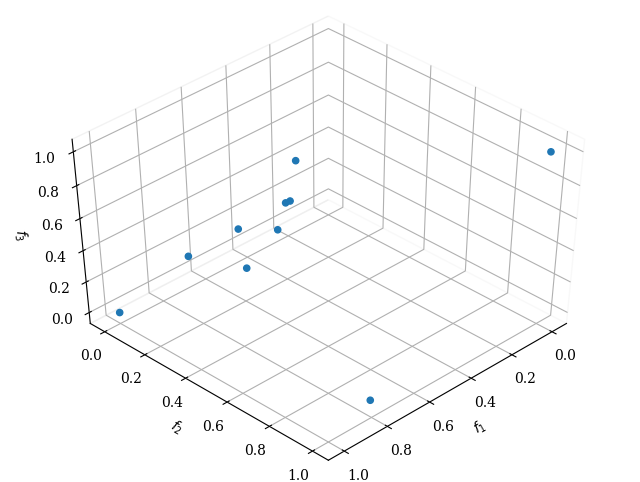

In [ ]:

    # Visualize the results
Scatter().add(result.F).show()


In [ ]:


PCP().add(result.F).show()
Heatmap().add(result.F).show()
print(result)

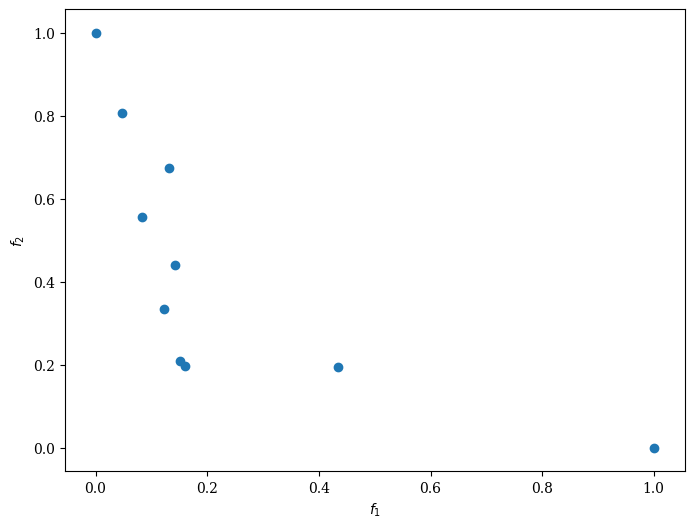

In [ ]:
Scatter().add(result.F[:, [2, 0]]).show()
